### Box Gym Environment Tutorial

*Date: May 25, 2025*, *Author: Max M. Sun*

This notebook is a tutorial for the box gym environment. It contains a sensor agent (robot) with a 2d single integrator dynamics (controlled by velocity), which samples binary signals from the environment and aims to find an underlying rectanglar box. 

The environment has a built-in prediction function, which is a "generative model" that predicts possible boxes (location + dimensions) given the signals received so far.

Your goal is to control the robot to move across the space to collect signal measurements, such that the uncertainty (variance) of the box predictions drops below a predefine threshold as quickly as possible. 

In [3]:
# uncomment and run the line below to download the box_gym environment code
!curl -o box_gym.py https://raw.githubusercontent.com/MurpheyLab/ME455_public/box_gym_project/box_gym.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0    426      0 --:--:-- --:--:-- --:--:--   437


In [4]:
# import regular packages
import numpy as np
np.set_printoptions(precision=4)
np.seterr(divide='ignore', invalid='ignore')
import time

# import the playground environment
from box_gym import BoxGymBase

SyntaxError: illegal target for annotation (box_gym.py, line 1)

In [ ]:
class BoxGym(BoxGymBase): 
    def __init__(
            self, 
            seed=0, # seed for random number generator
            dt=0.1, # time interval 
            sensor_box_size=0.2, # field of view of the sensor box 
            num_sensor_samples=10, # number of samples drawn within the FoV per time step
            max_velocity=0.05, # maximum velocity of the agent (sensor)
            inference_num=100, # number of boxes to be inferred from the data collected so far
        ):
        super(BoxGym, self).__init__(seed, dt, sensor_box_size, num_sensor_samples, max_velocity, inference_num)

        # you can add more variables here if needed
        # for example, we can track of all the positions of the sensor over time
        self.sensor_pos_traj = []
        
    def plot(self):
        # Add your own (matplotlib) visualization code here 
        # for example, we can visualize the trajectory of the sensor as blue dots
        ax = self.ax  # "ax" here is equivalent to "fig, ax = plt.subplots(...)"
        traj_np = np.array(self.sensor_pos_traj)
        ax.plot(traj_np[:,0], traj_np[:,1], linestyle='', marker='o', markersize=3, color='blue', alpha=0.3)

        # Keep this line to visualize the default information (positive and negative samples, predicted boxes)
        super().plot()

    def plan(
            self, 
            obs # the "obs" variable returned from the "step()" function
        ):
        # What does the "obs" variable include?

        # current postion of the sensor
        sensor_pos = obs['sensor_pos']
        # positions of the positive signals from the lastest measurement 
        curr_positive = obs['curr_positive']  
        # positions of the negative signals from the lastest measurement
        curr_negative = obs['curr_negative']  
        # positions of all the positive signals from the all the measurements so far
        hist_positive = obs['hist_positive']  
        # positions of all the negative signals from the all the measurements so far
        hist_negative = obs['hist_negative']  
        # predicted boxes (samples) based on the all the signals (positive and negative) so far,
        # using the built-in prediction function from the BoxGymBase environment 
        # pred_boxes is a numpy array with the shape (N, 4), N being the number of predicted samples
        # the first column contains the x coordinates of the bottom left corner of the boxes
        # the second column contains the y coordinates of the bottom left corner of the boxes
        # the third column contains the x coordinates of the upper right corner of the boxes
        # the fourth column contains the y coordinates of the upper right corner of the boxes
        pred_boxes = obs['pred_boxes']  
        # print(f'pred_boxes.shape: {pred_boxes.shape}')

        # for example, we can keep track of the positions of the sensor over time
        self.sensor_pos_traj.append(sensor_pos)

        # write your own logic to generate action from "obs"
        action = np.random.uniform(-1.0, 1.0, size=2)  # replace this line

        return action

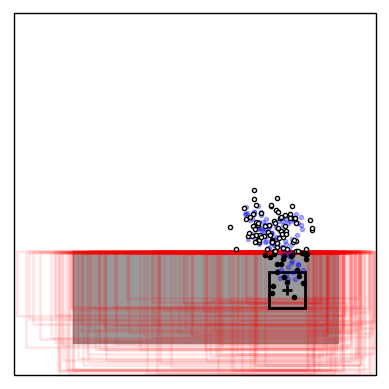

In [ ]:
env = BoxGym(seed=1, sensor_box_size=0.2, num_sensor_samples=1, max_velocity=0.2, inference_num=100)
obs = env.reset()  # reset and re-randomize the environment

num_tsteps = 100  # number of total time steps for the experiment
for t in range(num_tsteps):
    # plan an action, which is the velocity of the robot/sensor
    # the robot is a 2d point mass with single-integrator dynamics (velocity-based control)
    action = env.plan(obs)
    
    # execute the action, receive new observation/information
    obs, cost, done, trash = env.step(action)  # cost is the variance of the predicted boxes
    
    # visualize the environment
    env.render(mode='notebook')   # choose mode='gui' if you are writing a local python script

    # if the cost is lower than the predefined threshold, task is successful
    if done:
        print(f'success in {t} steps!')
        break